<a href="https://colab.research.google.com/github/anu-shree-anil/Machine-learning-Algorithms/blob/main/Multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import math

#loading and preprocessing the data
iris=datasets.load_iris()
print(iris.DESCR)
df=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
X=pd.DataFrame(iris.data)
Y=pd.DataFrame(iris.target)
print("ORIGINAL DATA:")
print(df)
print(X,Y)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [244]:
#normalize the dataset
for column in X.columns:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min()) 

print(X)
#One-vs-All
df=X.copy()
df['target']=Y
d1=df.copy()
print(d1)
#Taking Iris-Setosa as all 1 and the rest of them as 0
d1["target"].replace({0.0: 1.0,1.0:0.0,2.0:0.0}, inplace=True)

#splitting the dataset
train1 = d1.sample(frac=0.6)
remaining_data = d1.drop(train1.index)

validation1 = remaining_data.sample(frac=0.5)
test1 = remaining_data.drop(validation1.index)


print("\nTRAIN SET")
print(train1)
print("\nVALIDATION SET")
print(validation1)
print("\nTEST SET")
print(test1)

d2=df.copy()
print(d2)
#Taking Iris-Versicolour as all 1 and the rest of them as 0
d2["target"].replace({0.0: 0.0,1.0:1.0,2.0:0.0}, inplace=True)

#splitting the dataset
train2 = d2.sample(frac=0.6)
remaining_data = d2.drop(train2.index)

validation2 = remaining_data.sample(frac=0.5)
test2 = remaining_data.drop(validation2.index)


print("\nTRAIN SET")
print(train2)
print("\nVALIDATION SET")
print(validation2)
print("\nTEST SET")
print(test2)

d3=df.copy()
print(d3)
#Taking Iris-Virginica as all 1 and the rest of them as 0
d3["target"].replace({0.0: 0.0,1.0:0.0,2.0:1.0}, inplace=True)

#splitting the dataset
train3 = d3.sample(frac=0.6)
remaining_data = d3.drop(train3.index)

validation3 = remaining_data.sample(frac=0.5)
test3 = remaining_data.drop(validation3.index)


print("\nTRAIN SET")
print(train3)
print("\nVALIDATION SET")
print(validation3)
print("\nTEST SET")
print(test3)
print(df)


            0         1         2         3
0    0.222222  0.625000  0.067797  0.041667
1    0.166667  0.416667  0.067797  0.041667
2    0.111111  0.500000  0.050847  0.041667
3    0.083333  0.458333  0.084746  0.041667
4    0.194444  0.666667  0.067797  0.041667
..        ...       ...       ...       ...
145  0.666667  0.416667  0.711864  0.916667
146  0.555556  0.208333  0.677966  0.750000
147  0.611111  0.416667  0.711864  0.791667
148  0.527778  0.583333  0.745763  0.916667
149  0.444444  0.416667  0.694915  0.708333

[150 rows x 4 columns]
            0         1         2         3  target
0    0.222222  0.625000  0.067797  0.041667       0
1    0.166667  0.416667  0.067797  0.041667       0
2    0.111111  0.500000  0.050847  0.041667       0
3    0.083333  0.458333  0.084746  0.041667       0
4    0.194444  0.666667  0.067797  0.041667       0
..        ...       ...       ...       ...     ...
145  0.666667  0.416667  0.711864  0.916667       2
146  0.555556  0.208333  0.67796

In [245]:
def logistic_regression(dataset,learning_rate,rho,epoch):
  
  rows = len(dataset.axes[0])
  cols = len(dataset.axes[1])
  X = dataset.iloc[:, :-1]
  Y = dataset.iloc[:, -1]

  X.insert(0, "DEFAULT",1, True)
  X_arr=X.to_numpy()
  Y_arr=Y.to_numpy()
  
 # X_arr=np.append(X_arr,0, axis=0)
  w=[]
  for i in range(cols):
    w.append(random.uniform(-0.3,0.3))

  w= np.array(w)  
  J_w=0
  J_w_in=0
  diff_J=0
  l=learning_rate
  m=len(X_arr)
  for i in range(epoch):
    
    h_x=1/(1+np.exp(-(np.dot(X_arr,w))))
    for k in range(m):
        J_w_in= J_w_in+Y_arr[k]*math.log(h_x[k])+(1-Y_arr[k])*math.log(1-h_x[k])
    
    J_w_in=-J_w_in/m

    for j in range(len(w)):
        for k in range(m):
       
            diff_J=(h_x[k]-Y_arr[k])*X_arr[k][j]
        w[j]=w[j]-(l*diff_J)/m

    
    h_x=1/(1+np.exp(-(np.dot(X_arr,w))))   
    for k in range(m):
        J_w= J_w+Y_arr[k]*math.log(h_x[k])+(1-Y_arr[k])*math.log(1-h_x[k])

    J_w=-J_w/m
    #if(abs(J_w-J_w_in)>rho):
      #break
  return w



In [246]:
#Training all the models
h1=logistic_regression(train1,0.2,0.001,10)
print(h1)

h2=logistic_regression(train2,0.2,0.001,10)
print(h2)

h3=logistic_regression(train3,0.2,0.001,10)
print(h3)

[ 0.1675904   0.06855987  0.17056989  0.2269862  -0.23977642]
[-0.01934813  0.28936934 -0.2228781  -0.04654576 -0.15722208]
[-0.121424    0.01526674  0.12085352 -0.03395192  0.10935956]


In [268]:
h=[h1,h2,h3]

def predict(dataset,weights):
  X = dataset.iloc[:, :-1]
  Y = dataset.iloc[:, -1]

  X.insert(0, "DEFAULT",1, True)
  X_arr=X.to_numpy()
  Y_arr=Y.to_numpy()
  Y_predict=np.zeros(len(Y_arr))
  
  Z1= 1/(1+ np.exp(-(np.dot(X_arr,weights[0]))))
  Z2= 1/(1+ np.exp(-(np.dot(X_arr,weights[1]))))
  Z3= 1/(1+ np.exp(-(np.dot(X_arr,weights[2]))))
  z=[Z1,Z2,Z3]
  for i in range(len(Z1)):
     m_a_x=float('-inf')
     pred=0.0
     for j in range(len(z)):
        if(m_a_x<z[j][i]):
          m_a_x=z[j][i]
          pred=j
        
     Y_predict[i]=pred
  count=0
  for i in range(np.size(Y_predict)):
    if (Y_predict[i]==Y_arr[i]):
      count=count+1;
    
  return Y_predict,(count/np.size(Y_predict))*100


#splitting the dataset
df=X.copy()
df['target']=Y
print(df)
train = df.sample(frac=0.6)
remaining_data = df.drop(train.index)

validation = remaining_data.sample(frac=0.5)
test = remaining_data.drop(validation.index)

print(predict(train,h)[1])


            0         1         2         3  target
0    0.222222  0.625000  0.067797  0.041667       0
1    0.166667  0.416667  0.067797  0.041667       0
2    0.111111  0.500000  0.050847  0.041667       0
3    0.083333  0.458333  0.084746  0.041667       0
4    0.194444  0.666667  0.067797  0.041667       0
..        ...       ...       ...       ...     ...
145  0.666667  0.416667  0.711864  0.916667       2
146  0.555556  0.208333  0.677966  0.750000       2
147  0.611111  0.416667  0.711864  0.791667       2
148  0.527778  0.583333  0.745763  0.916667       2
149  0.444444  0.416667  0.694915  0.708333       2

[150 rows x 5 columns]
33.33333333333333


In [267]:
#Hyperparameter Tuning
h1=logistic_regression(validation1,0.2,0.001,10)

h2=logistic_regression(validation2,0.2,0.001,10)

h3=logistic_regression(validation3,0.2,0.001,10)
h=[h1,h2,h3]
print("Accuracy: ")
print(predict(validation,h)[1])

Accuracy: 
33.33333333333333


In [266]:
h1=logistic_regression(validation1,0.2,0.001,15)

h2=logistic_regression(validation2,0.2,0.001,15)

h3=logistic_regression(validation3,0.2,0.001,15)
h=[h1,h2,h3]
print("Accuracy: ")
print(predict(validation,h)[1])

Accuracy: 
40.0


In [265]:
h1=logistic_regression(validation1,0.2,0.001,50)

h2=logistic_regression(validation2,0.2,0.001,50)

h3=logistic_regression(validation3,0.2,0.001,50)
h=[h1,h2,h3]
print("Accuracy: ")
print(predict(validation,h)[1])

Accuracy: 
30.0


In [264]:
h1=logistic_regression(validation1,0.2,0.001,7)

h2=logistic_regression(validation2,0.2,0.001,7)

h3=logistic_regression(validation3,0.2,0.001,7)
h=[h1,h2,h3]
print("Accuracy: ")
print(predict(validation,h)[1])

Accuracy: 
20.0


In [263]:
h1=logistic_regression(validation1,0.2,0.001,3)

h2=logistic_regression(validation2,0.2,0.001,3)

h3=logistic_regression(validation3,0.2,0.001,3)
h=[h1,h2,h3]
print("Accuracy: ")
print(predict(validation,h)[1])

Accuracy: 
36.666666666666664


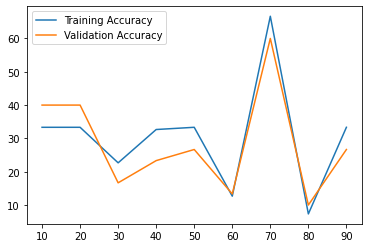

In [259]:
#checking for overfitting
epochs=[10,20,30,40,50,60,70,80,90]
train_acc=[]
valid_acc=[]

for i in epochs:
    h1=logistic_regression(train1,0.2,0.001,i)

    h2=logistic_regression(train2,0.2,0.001,i)

    h3=logistic_regression(train3,0.2,0.001,i)
    h=[h1,h2,h3]
    train_acc.append(predict(train,h)[1])
    valid_acc.append(predict(validation,h)[1])

plt.plot(epochs,train_acc, label = "Training Accuracy")
plt.plot(epochs,valid_acc, label = "Validation Accuracy")
plt.legend()
plt.show()  

In [262]:
#classification accuracy for different percentage of training samples
for i in range(10):
  train = df.sample(frac=((i+1)/10))
  test = df.drop(train.index)
  h1=logistic_regression(train,0.2,0.001,40)
  h2=logistic_regression(train,0.2,0.001,40)
  h3=logistic_regression(train,0.2,0.001,40)
  h=[h1,h2,h3]
  pred1=predict(train,h)
  pred2=predict(test,h)
  print("Train Accuracy for ",(i+1)*10,"percentage of training samples: ",pred1[1])
  print("Test Accuracy for ",(i+1)*10,"percentage of training samples: ",pred2[1])
  print("\n")

Train Accuracy for  10 percentage of training samples:  33.33333333333333
Test Accuracy for  10 percentage of training samples:  33.33333333333333


Train Accuracy for  20 percentage of training samples:  30.0
Test Accuracy for  20 percentage of training samples:  34.166666666666664


Train Accuracy for  30 percentage of training samples:  26.666666666666668
Test Accuracy for  30 percentage of training samples:  36.19047619047619


Train Accuracy for  40 percentage of training samples:  36.666666666666664
Test Accuracy for  40 percentage of training samples:  31.11111111111111


Train Accuracy for  50 percentage of training samples:  36.0
Test Accuracy for  50 percentage of training samples:  28.000000000000004


Train Accuracy for  60 percentage of training samples:  2.2222222222222223
Test Accuracy for  60 percentage of training samples:  0.0


Train Accuracy for  70 percentage of training samples:  34.285714285714285
Test Accuracy for  70 percentage of training samples:  31.11111111

ZeroDivisionError: ignored